In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [4]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.10.0


In [5]:
import torch
print(torch.__version__)

2.3.1


In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt


In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train.shape

(60000, 28, 28)

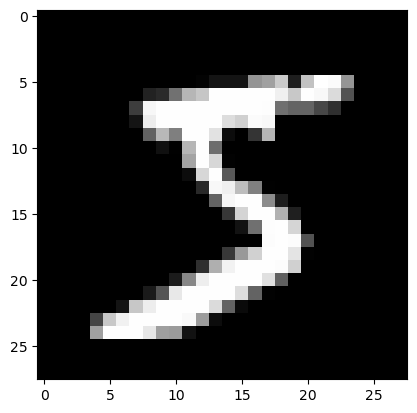

In [8]:
plt.imshow(x_train[0],cmap='Greys_r')

In [9]:
print(x_train.shape,'Train Samples')
print(x_test.shape,'Test Samples')

(60000, 28, 28) Train Samples
(10000, 28, 28) Test Samples


In [10]:
x_train=x_train.reshape(len(x_train),28*28)
x_test=x_test.reshape(len(x_test),28*28)

In [11]:
print(x_train.shape,'Train Samples')
print(x_test.shape,'Test Samples')

(60000, 784) Train Samples
(10000, 784) Test Samples


In [12]:
print(x_train.min())
print(x_train.max())

0
255


In [13]:
x_train=x_train/255
x_test=x_test/255
print(x_train.max())
print(x_test.max())

1.0
1.0


In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
num_class=10
y_train=tf.keras.utils.to_categorical(y_train,num_class)
y_test=tf.keras.utils.to_categorical(y_test,num_class)
y_train[333]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [16]:
model1=Sequential()
model1.add(Dense(64,activation='relu',input_shape=(784,)))
model1.add(Dropout(0.2))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10,activation='softmax'))

In [17]:
learning_rate=.001
model1.compile(loss='categorical_crossentropy',
               optimizer=RMSprop(learning_rate=learning_rate),
               metrics=['accuracy'])

In [18]:
batch_size=128
epochs=5
history=model1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
469/469 [==============================] - 5s 6ms/step - loss: 0.4997 - accuracy: 0.8525 - val_loss: 0.1938 - val_accuracy: 0.9421
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2439 - accuracy: 0.9282 - val_loss: 0.1514 - val_accuracy: 0.9547
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1958 - accuracy: 0.9427 - val_loss: 0.1316 - val_accuracy: 0.9602
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1658 - accuracy: 0.9513 - val_loss: 0.1146 - val_accuracy: 0.9654
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1527 - accuracy: 0.9536 - val_loss: 0.1055 - val_accuracy: 0.9682
